In [2]:
import sys
from pathlib import Path
sys.path.insert(0, '/scratch/imb/Xiao/STimage')
from stimage._utils import Read10X, QC_plot
import shutil
import pandas as pd

sample,Visium_folder,count_matrix_h5_file,histology_image

In [3]:
BASE_PATH = Path("/scratch/imb/Xiao/DATA/RAW/Liver_visium")
OUT_PATH = Path("/scratch/imb/Xiao/DATA/DATASET/Liver_visium")
OUT_PATH.mkdir(exist_ok=True, parents=True)

C73_B1_VISIUM


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


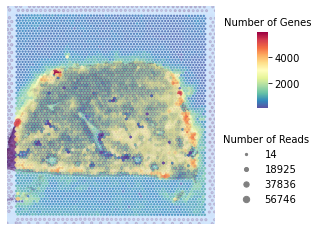

(25840, 25360, 4)
C73_C1_VISIUM


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


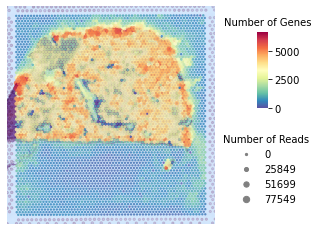

(26036, 25507, 4)
C73_D1_VISIUM


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


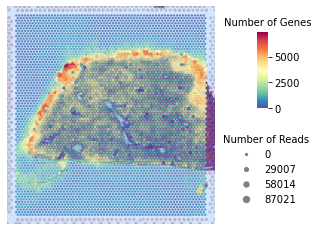

(25921, 25369, 4)
C73_A1_VISIUM


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


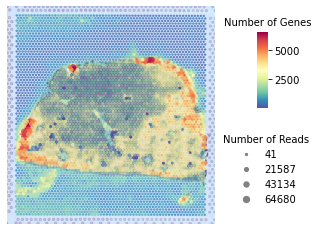

(25741, 25205, 4)


In [5]:
df = pd.DataFrame()
for sample_path in BASE_PATH.glob("./*"):
    sample = sample_path.stem
    print(sample)
    Visium_folder = sample_path
    count_matrix_h5_file = "filtered_feature_bc_matrix.h5"
    histology_image = BASE_PATH / sample / "image.tiff"
    adata = Read10X(path=Visium_folder,
                                count_file=count_matrix_h5_file,
                                library_id=sample,
                                source_image_path=histology_image,
                                quality="fulres")
    QC_plot(adata, image_scale=10)
    print(adata.uns["spatial"][sample]['images']["fulres"].shape)
    df = df.append(pd.Series({"sample": sample, 
                              "Visium_folder": Visium_folder, 
                              "count_matrix_h5_file": count_matrix_h5_file, 
                              "histology_image": histology_image}), ignore_index=True)

In [6]:
df

,sample,Visium_folder,count_matrix_h5_file,histology_image
0,C73_B1_VISIUM,/scratch/imb/Xiao/DATA/RAW/Liver_visium/C73_B1...,filtered_feature_bc_matrix.h5,/scratch/imb/Xiao/DATA/RAW/Liver_visium/C73_B1...
1,C73_C1_VISIUM,/scratch/imb/Xiao/DATA/RAW/Liver_visium/C73_C1...,filtered_feature_bc_matrix.h5,/scratch/imb/Xiao/DATA/RAW/Liver_visium/C73_C1...
2,C73_D1_VISIUM,/scratch/imb/Xiao/DATA/RAW/Liver_visium/C73_D1...,filtered_feature_bc_matrix.h5,/scratch/imb/Xiao/DATA/RAW/Liver_visium/C73_D1...
3,C73_A1_VISIUM,/scratch/imb/Xiao/DATA/RAW/Liver_visium/C73_A1...,filtered_feature_bc_matrix.h5,/scratch/imb/Xiao/DATA/RAW/Liver_visium/C73_A1...


In [8]:
df.to_csv(OUT_PATH / "dataset_4liver.csv")